# Aprendizado Não-Supervisionado (Clustering)

## K-Means Clustering

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
data = pd.read_csv('store.csv')

In [45]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [47]:
data.columns = ['IdCliente', 'Genero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)']

In [48]:
data.set_index('IdCliente', inplace=True)

In [49]:
df = data[['Renda Anual', 'Nivel de Gasto (1-100)']]

In [50]:
df

,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


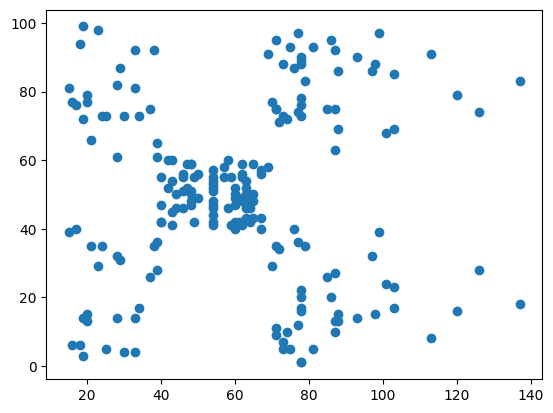

In [51]:
plt.scatter(df['Renda Anual'], df['Nivel de Gasto (1-100)'])

## Identificação de quantidade de Clusters
Método Elbow (cotovelo)

In [52]:
from sklearn.cluster import KMeans

Idetificar de 1 10 cluster e ver qual é mais recomendado

d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_k

Text(0, 0.5, 'Varoações')

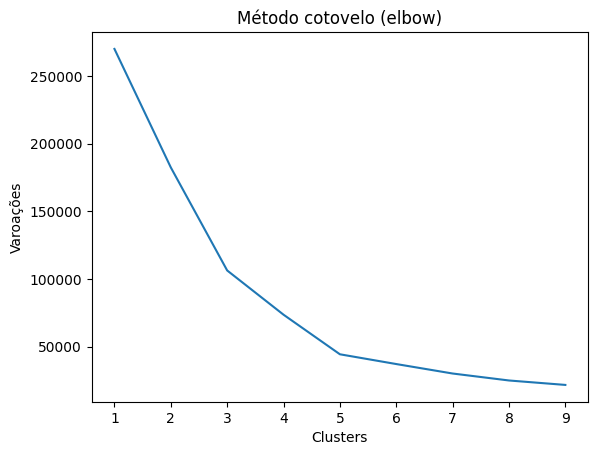

In [53]:
X = df.values
variacoes = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método cotovelo (elbow)')
plt.xlabel('Clusters')
plt.ylabel('Varoações')

## Segregação dos dados

In [54]:
kmeans_final = KMeans(n_clusters=5)

In [55]:
kmeans_final.fit(X)

d:\Ferramentas\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [56]:
cluster_pred = kmeans_final.predict(X)

In [57]:
cluster_centro = kmeans_final.cluster_centers_

In [58]:
cluster_centro

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

## Análise de Cluster

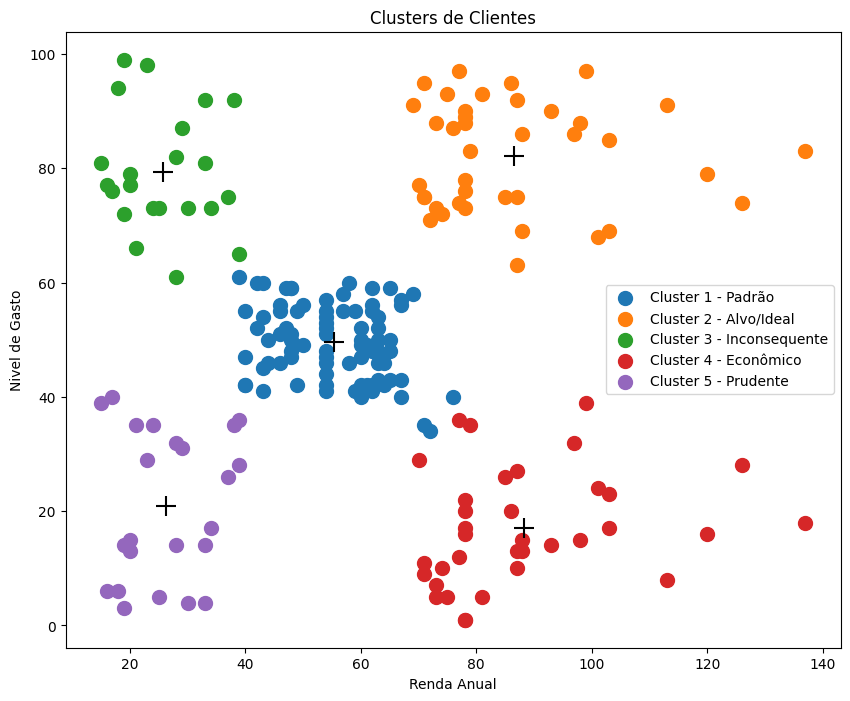

In [89]:
plt.figure(figsize=(10, 8))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1], s=100, label='Cluster 1 - Padrão')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1], s=100, label='Cluster 2 - Alvo/Ideal')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1], s=100, label='Cluster 3 - Inconsequente')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1], s=100, label='Cluster 4 - Econômico')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1], s=100, label='Cluster 5 - Prudente')
plt.scatter(cluster_centro[:, 0], cluster_centro[:, 1], marker='+', s=200, c='black')

plt.legend()
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nivel de Gasto')
plt.show()

# Conclusão: 
* Com estes cluster, é possível nostar uma diferença de clientes de uma determinada loja. Neste caso, a loja poderá se adequar a cada tipo de cliente, campanhas especificas sabendo o comportamento do cliente e para quem vai enviar, como por exemplo uma mensagem personalizada.